# Aplicaciones de Minería de Datos I
### Lectura 6: Introducción al Procesamiento de datos I


<p><b>¿Cuáles son los objetivos del procesamiento de datos?</b><p>

<ol>
    <li>	Limpieza: manejar errores y valores no válidos</li>
    <li>	Extracción de características: crear nuevas características, combinando y transformando las existentes
    </li>
</ol>
<p><b>¡Es importante encontrar patrones!</b></p>

<p><b>También es importante seguir reglas de diseño y entender el dominio de la aplicación</b></p>

<ol start="3">
    <li>Reducción de datos:</li>
    <ol>
        <li>Muestreo</li>
        <li>Selección de características</li>
        <li>Dimensión de reducciones mediante transformaciones</li>
   </ol>
</ol>

<p><b>¿Qué es el muestreo?</b></p>

<b><i>El muestreo  es una  herramienta   cuya  función básica  es  determinar  que  parte  de  una población debe  examinarse, con  la  finalidad  de  hacer inferencias sobre una población</i></b>

<p><b>Muestreo estadístico</b></p>

<ol>
<li> Utiliza cálculos matemáticos para seleccionar y evaluar muestras de un conjunto de datos</li>
<li> Delinear en términos numéricos los parámetros y niveles de precisión asociados con una conclusión</li>
</ol>

<p><b>¿Cuál es el riesgo del muestreo estadístico?</b></p>

<p>Sirve para familiarizarse con lo datos pero <b>no para llegar a una conclusión</b>.</p>

<p>Las siguientes consideraciones deben de ser tomadas en cuenta para realizar un muestreo estadístico:</p>

<ol>
<li> Un alcance definido y aceptado científicamente</li>
<li> Que permita al analista de ciencia de datos mantener un juicio profesional con respecto a los riesgos del contexto y materializar los hechos</li>
<li> Desplegar los resultados del muestreo y una conclusión con los datos seleccionados</li>
</ol>

<p><b>¿Y qué es el muestreo no estadístico?</b></p>

<ol>
<li> No requiere cálculos estadísticos</li>
<li> Recae en el muestreo subjetivo seleccionado por el analista y tiene un enfoque menos estandarizado</li>
</ol>

<p><b>¿Cuándo es útil el muestreo no estadístico?</b></p>

<ol>
<li> Cuando el analista necesita emplear un juicio profesional subjetivo</li>
<li> Hay un caso único donde se necesita un alcance menos rígido</li>
<li> El analista no necesita estar restringido a números de manera explícita o al riesgo</li>
</ol>

<p><b>Riesgos del muestreo</b></p>

<p>La muestra seleccionada mediante muestreo estadístico o no estadístico <b>no refleja totalmente a la población</b></p>

<p><font color='red'>¿Por qué?</font></p>

<p><i>Porque el analista puede tomar una conclusión basado en una muestra que difiere de la realidad o las condiciones de toda la población del conjunto de datos.</i></p>

<p><b>¿Y el riesgo del no muestreo?</b></p>

<p>Es cuando el analista selecciona apropiadamente una muestra pero llega a una mala conclusión.</p>

### Muestreo aleatorio

<p>Es una técnica de selección en la que una muestra es seleccionada en un subconjunto con la misma <b>probabilidad</b> de ser escogida, con respecto a las demás.</p>

![title](Figuras/img1-lect5.png)

#### Acerca de la probabilidad

<p>En una idea básica la probabilidad es una rama matemática que trata de resolver una pregunta básica: <b>¿Cuál es la oportunidad de que un evento ocurra?</b></p>


<ul>
    <li>  Un <b>evento</b> es una salida de interés</li>
    <li> Todas las posibilidades de que ocurra un evento es denominado <b>espacio muestral</b></li>
    
</ul>

#### De la probabilidad a la estadística

<p>Con varios datos recolectados en experimentos de diferentes eventos, <b>la estadística permite calcular las probabilidades utilizando observaciones reales</b></p>

<ul>
    <li> La probabilidad da paso a la teoría</li>
    <li> La estadística provee las herramientas para probar la probabilidad utilizando datos</li>
</ul>

In [1]:
%pip install pandas
#pip show pandas
import pandas as pd
print(pd.__version__)

Note: you may need to restart the kernel to use updated packages.
2.2.2


In [66]:
#%pip install pandas
import pandas as pd
import numpy as np
from scripts_muestreo import muestreo

### Carga del conjunto de datos

In [5]:
dataset = pd.read_csv('https://alhernandezsua.gitlab.io/amd-misti/datasets/dataset_malwares.csv')
dataset = dataset.drop(columns=['Name'])

In [6]:
dataset.head()

,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,e_csum,...,SectionMaxChar,SectionMainChar,DirectoryEntryImport,DirectoryEntryImportSize,DirectoryEntryExport,ImageDirectoryEntryExport,ImageDirectoryEntryImport,ImageDirectoryEntryResource,ImageDirectoryEntryException,ImageDirectoryEntrySecurity
0,23117,144,3,0,4,0,65535,0,184,0,...,3758096608,0,7,152,0,0,54440,77824,73728,0
1,23117,144,3,0,4,0,65535,0,184,0,...,3791650880,0,16,311,0,0,262276,294912,0,346112
2,23117,144,3,0,4,0,65535,0,184,0,...,3221225536,0,6,176,0,0,36864,40960,0,0
3,23117,144,3,0,4,0,65535,0,184,0,...,3224371328,0,8,155,0,0,356352,1003520,0,14109472
4,23117,144,3,0,4,0,65535,0,184,0,...,3227516992,0,2,43,0,0,61440,73728,0,90624


In [7]:
## El método sample regresa un porción muestreada de un objeto
df_aleatorio = dataset.sample(frac=0.5)

In [8]:
#El método head muestra las primeras diez filas de un objeto DataFrame
df_aleatorio.head()

,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,e_csum,...,SectionMaxChar,SectionMainChar,DirectoryEntryImport,DirectoryEntryImportSize,DirectoryEntryExport,ImageDirectoryEntryExport,ImageDirectoryEntryImport,ImageDirectoryEntryResource,ImageDirectoryEntryException,ImageDirectoryEntrySecurity
17521,23117,144,3,0,4,0,65535,0,184,0,...,1610612768,0,1,1,0,0,357928,360448,0,0
2592,23117,144,3,0,4,0,65535,0,184,0,...,3791650848,0,3,52,0,0,221292,225280,208896,0
3152,23117,144,3,0,4,0,65535,0,184,0,...,3221225536,0,3,99,0,0,247708,851968,0,0
17337,23117,144,3,0,4,0,65535,0,184,0,...,1610612800,0,0,0,1,7872,0,8192,0,0
6611,23117,144,3,0,4,0,65535,0,184,0,...,3791650848,0,0,0,0,0,405784,409600,45056,468992


#### Muestreo sistemático
<p>Selecciona las muestras basados en un intervalo de muestreo (cada $n$-unidad seleccionada, dada una población).</p>

![title](Figuras/img2-lect5.png)

In [9]:
muestra_sistematica = muestreo.muestreo_sistematico(dataset, 4)
muestra_sistematica.head()

,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,e_csum,...,SectionMaxChar,SectionMainChar,DirectoryEntryImport,DirectoryEntryImportSize,DirectoryEntryExport,ImageDirectoryEntryExport,ImageDirectoryEntryImport,ImageDirectoryEntryResource,ImageDirectoryEntryException,ImageDirectoryEntrySecurity
0,23117,144,3,0,4,0,65535,0,184,0,...,3758096608,0,7,152,0,0,54440,77824,73728,0
4,23117,144,3,0,4,0,65535,0,184,0,...,3227516992,0,2,43,0,0,61440,73728,0,90624
8,23117,144,3,0,4,0,65535,0,184,0,...,3221225536,0,14,329,16,533872,526528,643072,0,930128
12,23117,144,3,0,4,0,65535,0,184,0,...,3221225536,0,7,115,0,0,69100,897024,0,893688
16,23117,144,3,0,4,0,65535,0,184,0,...,3221225536,0,8,204,0,0,181592,0,0,0


In [10]:
muestra_sistematica_aleatoria = muestra_sistematica.sample(frac=0.4)
muestra_sistematica_aleatoria.head()

,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,e_csum,...,SectionMaxChar,SectionMainChar,DirectoryEntryImport,DirectoryEntryImportSize,DirectoryEntryExport,ImageDirectoryEntryExport,ImageDirectoryEntryImport,ImageDirectoryEntryResource,ImageDirectoryEntryException,ImageDirectoryEntrySecurity
6428,23117,144,3,0,4,0,65535,0,184,0,...,3221225536,0,28,987,87,5184752,5144876,5533696,0,6180864
17916,23117,144,3,0,4,0,65535,0,184,0,...,3221225536,0,7,83,0,0,29392,32768,24576,0
7544,23117,144,3,0,4,0,65535,0,184,0,...,3758096480,0,1,4,0,0,649764,602112,0,0
19368,23117,144,3,0,4,0,65535,0,184,0,...,3221225536,0,18,251,2,15224,100456,110592,90112,0
17284,23117,144,3,0,4,0,65535,0,184,0,...,3221225536,0,29,245,3,178896,197704,208896,0,0


#### Muestreo por agrupamiento

<p>Divide la población en grupos del mismo tamaño y selecciona los mismos cada $t$ tiempo.</p>

![title](Figuras/img3-lect5.png)

In [11]:
# Obtiene una muestra de grupo 
muestra_cluster = muestreo.muestreo_agrupamiento(dataset,9)
muestra_cluster.head()
#muestra_cluster.to_csv('muestra_agrupamiento.csv')

,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,e_csum,...,SectionMainChar,DirectoryEntryImport,DirectoryEntryImportSize,DirectoryEntryExport,ImageDirectoryEntryExport,ImageDirectoryEntryImport,ImageDirectoryEntryResource,ImageDirectoryEntryException,ImageDirectoryEntrySecurity,cluster_id
2179,23117,144,3,0,4,0,65535,0,184,0,...,0,6,129,4,149072,146140,167936,0,0,2
2180,23117,144,3,0,4,0,65535,0,184,0,...,0,4,76,0,0,286720,290816,0,0,2
2181,23117,144,3,0,4,0,65535,0,184,0,...,0,7,152,0,0,54832,77824,73728,0,2
2182,23117,144,3,0,4,0,65535,0,184,0,...,0,7,141,0,0,62540,81920,0,0,2
2183,23117,144,3,0,4,0,65535,0,184,0,...,0,4,43,0,0,12476,20480,0,0,2


In [12]:
# Desplegar las últimas cinco muestras
muestra_cluster.tail()

,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,e_csum,...,SectionMainChar,DirectoryEntryImport,DirectoryEntryImportSize,DirectoryEntryExport,ImageDirectoryEntryExport,ImageDirectoryEntryImport,ImageDirectoryEntryResource,ImageDirectoryEntryException,ImageDirectoryEntrySecurity,cluster_id
17427,23117,144,3,0,4,0,65535,0,184,0,...,0,0,0,1131,4160,0,57344,0,55296,8
17428,23117,144,3,0,4,0,65535,0,184,0,...,0,0,0,11,4240,0,8192,0,0,8
17429,23117,144,3,0,4,0,65535,0,184,0,...,0,0,0,65,4160,0,8192,0,5120,8
17430,23117,144,3,0,4,0,65535,0,184,0,...,0,18,140,9,1936896,1946232,1953792,0,0,8
17431,23117,144,3,0,4,0,65535,0,184,0,...,0,0,0,1,7312,0,8192,0,0,8


#### Muestreo aleatorio estratificado

<p>Es un método que divide la población en subgrupos (strata) y selecciona muestras aleatorias donde cada unidad tenga la misma probabilidad de ser seleccionada.</p>

![title](Figuras/img4-lect5.png)

In [18]:
#%pip install scikit-learn
from sklearn.model_selection import StratifiedShuffleSplit

# Proponer los datos de division
division = StratifiedShuffleSplit(n_splits=1, test_size=30)

# Realizar la division estratificada
for x,y in division.split(dataset, dataset['Malware']):
    #iloc identifica la muestras por índice
    muestra_estratificada = dataset.iloc[y].sort_values(by='DirectoryEntryImport')

muestra_estratificada.head()

,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,e_csum,...,SectionMainChar,DirectoryEntryImport,DirectoryEntryImportSize,DirectoryEntryExport,ImageDirectoryEntryExport,ImageDirectoryEntryImport,ImageDirectoryEntryResource,ImageDirectoryEntryException,ImageDirectoryEntrySecurity,cluster_id
14724,23117,144,3,0,4,0,65535,0,184,0,...,0,0,0,0,0,0,4096,0,0,7
393,23117,144,3,0,4,0,65535,0,184,0,...,0,0,0,0,4128,0,8192,0,5632,1
6910,23117,144,3,0,4,0,65535,0,184,0,...,0,1,52,4,648480,648084,667648,0,0,4
14696,23117,144,3,0,4,0,65535,0,184,0,...,0,1,1,0,0,262608,270336,0,257536,7
8611,23117,80,2,0,4,15,65535,0,184,0,...,0,1,32,0,0,226453,49152,0,0,4


In [21]:
muestra_estratificada.to_csv('mmuestra_estratificada.csv')

## Limpieza de datos

<p>El objetivo es detectar y eliminar errores, valores no válidos. Aún así algunos valores distantes pueden revelar detalles importantes.</p>

#### Estrategias

<ol>
<li>	Determinar las inconsistencias si los mismos datos están disponibles en diferentes orígenes</li>
<li> Utilizar el dominio del conocimiento:</li>
</ol>
<ul>
    <li>Conocer los rangos de valores</li>
    <li>Conocer relaciones</li>
</ul>

<ol start="3">
<li>	Analizar los valores extremos</li>
<li>	Suavizar los datos reduciendo el ruido y las fluctuaciones aleatorias:</li>
</ol>
<ul>
<li>Escalar, convertir a valores discretos, reducción de dimensiones</li>
</ul>
    
5.	Si es posible, reemplaza con valores correctos, de otra manera:

<ul>
    <li>Si una característica tiene ausencia de valores, compensar la característica</li>
    <li>Si un registro tiene una gran ausencia de valores, es necesario compensar el registro</li>
</ul>

<p><font color='red'>¿Cómo?</font></p>

<ul>
    <li>Calcular la media o mediana de la característica (entre registros o vecinos similares)</li>
<li>Predecir los valores faltantes basados en otras variables</li>
<li>Reemplazar los valores perdidos mediante técnicas de similitud</li>
</ul>

In [22]:
dataset.describe()

,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,e_csum,...,SectionMainChar,DirectoryEntryImport,DirectoryEntryImportSize,DirectoryEntryExport,ImageDirectoryEntryExport,ImageDirectoryEntryImport,ImageDirectoryEntryResource,ImageDirectoryEntryException,ImageDirectoryEntrySecurity,cluster_id
count,19611.0,19611.000000,19611.000000,19611.000000,19611.000000,19611.000000,19611.000000,19611.000000,19611.00000,19611.000000,...,19611.0,19611.000000,19611.000000,19611.000000,1.961100e+04,1.961100e+04,1.961100e+04,1.961100e+04,1.961100e+04,19611.000000
mean,23117.0,178.615726,71.660752,49.146958,37.370710,37.032635,64178.739687,10.418490,226.46530,29.689103,...,0.0,6.112437,101.912804,14.131865,3.368566e+05,4.047213e+05,5.555810e+05,1.238834e+06,8.814868e+05,5.000000
std,0.0,987.200729,1445.192977,1212.201919,864.515405,915.833139,9110.755873,637.116265,1249.68033,1015.303419,...,0.0,7.525158,127.076767,154.958102,2.181191e+07,4.704601e+06,6.772167e+06,5.868961e+07,2.167579e+07,2.582055
min,23117.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000
25%,23117.0,144.000000,3.000000,0.000000,4.000000,0.000000,65535.000000,0.000000,184.00000,0.000000,...,0.0,2.000000,17.000000,0.000000,0.000000e+00,2.960400e+04,4.096000e+04,0.000000e+00,0.000000e+00,3.000000
50%,23117.0,144.000000,3.000000,0.000000,4.000000,0.000000,65535.000000,0.000000,184.00000,0.000000,...,0.0,4.000000,80.000000,0.000000,0.000000e+00,8.222400e+04,1.310720e+05,0.000000e+00,0.000000e+00,5.000000
75%,23117.0,144.000000,3.000000,0.000000,4.000000,0.000000,65535.000000,0.000000,184.00000,0.000000,...,0.0,8.000000,135.000000,0.000000,0.000000e+00,2.477080e+05,3.870720e+05,0.000000e+00,3.184640e+05,7.000000
max,23117.0,59448.000000,63200.000000,64613.000000,43690.000000,43690.000000,65535.000000,61436.000000,65464.00000,63262.000000,...,0.0,588.000000,4016.000000,7319.000000,2.147484e+09,5.368914e+08,8.304108e+08,2.906159e+09,2.415919e+09,9.000000


In [23]:
#Considere la siguiente lista
lista_uno = np.array([1, None, 2, 3])
#Mostrar los tipos de datos contenidos en la lista
print(lista_uno.dtype)
#El tipo de dato None es una forma común en el lenguaje de programación Python para representar la asuecncia de valores

object


In [25]:
df_uno = pd.DataFrame(lista_uno,columns=['lista_uno'])
df_uno['lista_uno']

0       1
1    None
2       2
3       3
Name: lista_uno, dtype: object

In [26]:
df_uno.describe()

,lista_uno
count,3
unique,3
top,1
freq,1


In [27]:
df_uno.dtypes

lista_uno    object
dtype: object

In [28]:
#Considere la siguiente lista
lista_dos = np.array([1,np.nan, 3, 4,np.nan]) 
print(lista_dos.dtype)
#El tipo de dato nan es una forma común en el lenguaje de programación Python para representar valores 
#que no pueden ser calculados o representados formalmente

float64


In [29]:
df_dos = pd.DataFrame(lista_dos,columns=['lista_dos'])
df_dos['lista_dos']

0    1.0
1    NaN
2    3.0
3    4.0
4    NaN
Name: lista_dos, dtype: float64

In [30]:
df_dos.describe()

,lista_dos
count,3.000000
mean,2.666667
std,1.527525
min,1.000000
25%,2.000000
50%,3.000000
75%,3.500000
max,4.000000


In [31]:
#Método para detectar valores faltantes
print(df_uno.isnull())
#Resaltar las(s) fila(s) con valores NaN
df_uno[df_uno['lista_uno'].isnull()]

   lista_uno
0      False
1       True
2      False
3      False


,lista_uno
1,None


In [32]:
#Método para detectar valores no nulos
print(df_uno.notnull())
df_uno[df_uno['lista_uno'].notnull()]

   lista_uno
0       True
1      False
2       True
3       True


,lista_uno
0,1
2,2
3,3


In [35]:
#Método para regresar la suma de todos los valores ausentes en una columna
lista_tres = np.array([np.nan,np.nan,1,1.5,0.23])
df_tres = pd.DataFrame(lista_tres,columns=['lista_tres'])
print("df_uno, columnas:",df_uno.isnull().sum())
print("df_dos, columnas:",df_dos.isnull().sum())
print("df_tres, columnas:",df_tres.isnull().sum())

df_uno, columnas: lista_uno    1
dtype: int64
df_dos, columnas: lista_dos    2
dtype: int64
df_tres, columnas: lista_tres    2
dtype: int64


In [42]:
##Eliminar valores faltantes o no representables
df_tres.dropna(how='any',subset=None, inplace=False)
# donde how: serán los valores aplicables
# thresh: umbral de valores
# subset: subconjunto de valores (columnas o filas a eleminar)
# inplace: si se cumple realiza la operación y regresa None
df_tres

,lista_tres
0,NaN
1,NaN
2,1.00
3,1.50
4,0.23


In [43]:
lista_cuatro = np.array([1, np.nan, 3, 4,np.nan]) 
df_cuatro =  pd.DataFrame(lista_cuatro,columns=['df_cuatro'])
print(df_cuatro)
#Reemplaza los valores no representables con un valor especificado
df_cuatro.fillna(value=10)

   df_cuatro
0        1.0
1        NaN
2        3.0
3        4.0
4        NaN


,df_cuatro
0,1.0
1,10.0
2,3.0
3,4.0
4,10.0


In [73]:
lista_cinco = np.array([5, np.nan, np.nan, 8,np.nan]) 
df_cinco =  pd.DataFrame(lista_cinco,columns=['lista_cinco'])
print(df_cinco)
#Reemplaza los valores no representables con un valor de la fila anterior
df_cinco.fillna(axis=0, method='ffill')

   lista_cinco
0          5.0
1          NaN
2          NaN
3          8.0
4          NaN


,lista_cinco
0,5.0
1,5.0
2,5.0
3,8.0
4,8.0


In [44]:
lista_seis = np.array([[5, np.nan, 7, 8,np.nan],[5,11,10,10,11],[11,5,13,11,5]])
df_seis = pd.DataFrame(lista_seis,columns=['a','b','c','d','e'])

In [91]:
df_seis

,a,b,c,d,e
0,5.0,NaN,7.0,8.0,NaN
1,5.0,11.0,10.0,10.0,11.0
2,11.0,5.0,13.0,11.0,5.0


In [45]:
df_seis.describe()

,a,b,c,d,e
count,3.000000,2.000000,3.0,3.000000,2.000000
mean,7.000000,8.000000,10.0,9.666667,8.000000
std,3.464102,4.242641,3.0,1.527525,4.242641
min,5.000000,5.000000,7.0,8.000000,5.000000
25%,5.000000,6.500000,8.5,9.000000,6.500000
50%,5.000000,8.000000,10.0,10.000000,8.000000
75%,8.000000,9.500000,11.5,10.500000,9.500000
max,11.000000,11.000000,13.0,11.000000,11.000000


In [46]:
df_seis.dtypes

a    float64
b    float64
c    float64
d    float64
e    float64
dtype: object

In [51]:
#conjunto de múltiples dimensiones
columnas = df_seis.columns
#print(columnas)
for columna in columnas:
    #Si hay algún valor verdadero np.nan en los valores de la columna
    if True in df_seis[columna].isnull().values:
        print(columna,"van a reemplazar mis valores por",df_seis[columna].mean())
        #el valor np.nan reemplázalo por la media de la columna
        df_seis[columna].fillna(value=df_seis[columna].mean(), inplace=True)

In [52]:
df_seis

,a,b,c,d,e
0,5.0,8.0,7.0,8.0,8.0
1,5.0,11.0,10.0,10.0,11.0
2,11.0,5.0,13.0,11.0,5.0


In [60]:
#Reemplazar por la media de una columna de manera manual
df_seis['b'].fillna(value=df_seis['b'].mean(), inplace=True)
df_seis['e'].fillna(value=df_seis['e'].mean(), inplace=True)

C:\Users\BlindSpot\AppData\Local\Temp\ipykernel_4428\2025649325.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_seis['b'].fillna(value=df_seis['b'].mean(), inplace=True)
C:\Users\BlindSpot\AppData\Local\Temp\ipykernel_4428\2025649325.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

In [59]:
columnas = dataset.columns
#print(columnas)
for columna in columnas:
    #Si hay algún valor verdadero np.nan en los valores de la columna
    if True in dataset[columna].isnull().values:
        print(columna,"van a reemplazar mis valores por",dataset[columna].mean())

## Métodos de extracción de características

<ol>
<li>	Escalamiento de datos: numérico $\rightarrow$ numérico</li>
<li>	Datos discretos: categórico $\rightarrow$ binario</li>
<li>	Grafos de similitud: cualquier objeto $\rightarrow$ grafo</li>
<li>	Transformaciones por reducción de dimensiones: crear nuevas y menos redundantes características para conservar las mejores</li>
    <ol>
        <li>Extracción de características y reducción de datos</li>
    </ol>  
</ol>

### Escalar y normalizar

<p><b>Problema</b>: las características con largas magnitudes dominan en funciones agregadas ( como la distancia Euclidiana)</p>

<p>1.	Escalamiento min-max:</p>

\begin{equation}
y= \frac{x-min(x)}{max(x)-min(x)} \in [0,1]
\end{equation}


In [99]:
#Importar las clases de escalamiento y normalización
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler,normalize
#Importar el ambiente de warnings
import warnings
#Todas las advertencias de depuración las ignore
warnings.filterwarnings('ignore')

In [100]:
# La columna de etiquetas
y = dataset['Malware']
#Las muestras sin etiquetas
X = dataset.drop(columns=['Malware'])

In [101]:
X.head()

,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,e_csum,...,SectionMainChar,DirectoryEntryImport,DirectoryEntryImportSize,DirectoryEntryExport,ImageDirectoryEntryExport,ImageDirectoryEntryImport,ImageDirectoryEntryResource,ImageDirectoryEntryException,ImageDirectoryEntrySecurity,cluster_id
0,23117,144,3,0,4,0,65535,0,184,0,...,0,7,152,0,0,54440,77824,73728,0,1
1,23117,144,3,0,4,0,65535,0,184,0,...,0,16,311,0,0,262276,294912,0,346112,1
2,23117,144,3,0,4,0,65535,0,184,0,...,0,6,176,0,0,36864,40960,0,0,1
3,23117,144,3,0,4,0,65535,0,184,0,...,0,8,155,0,0,356352,1003520,0,14109472,1
4,23117,144,3,0,4,0,65535,0,184,0,...,0,2,43,0,0,61440,73728,0,90624,1


In [103]:
#Objeto de la clase MinMaxScaler
scaler = MinMaxScaler()
#Entrenar (Estimador fit) y Transfomar (Predictor fit_transform)
X_sc = scaler.fit_transform(X)
#Constuir un DtaFrame con el conjunto escalado 
X_sc_df = pd.DataFrame(X_sc,columns=X.columns)
X_sc_df.head()

,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,e_csum,...,SectionMainChar,DirectoryEntryImport,DirectoryEntryImportSize,DirectoryEntryExport,ImageDirectoryEntryExport,ImageDirectoryEntryImport,ImageDirectoryEntryResource,ImageDirectoryEntryException,ImageDirectoryEntrySecurity,cluster_id
0,0.0,0.002422,0.000047,0.0,0.000092,0.0,1.0,0.0,0.002811,0.0,...,0.0,0.011905,0.037849,0.0,0.0,0.000101,0.000094,0.000025,0.000000,0.0
1,0.0,0.002422,0.000047,0.0,0.000092,0.0,1.0,0.0,0.002811,0.0,...,0.0,0.027211,0.077440,0.0,0.0,0.000489,0.000355,0.000000,0.000143,0.0
2,0.0,0.002422,0.000047,0.0,0.000092,0.0,1.0,0.0,0.002811,0.0,...,0.0,0.010204,0.043825,0.0,0.0,0.000069,0.000049,0.000000,0.000000,0.0
3,0.0,0.002422,0.000047,0.0,0.000092,0.0,1.0,0.0,0.002811,0.0,...,0.0,0.013605,0.038596,0.0,0.0,0.000664,0.001208,0.000000,0.005840,0.0
4,0.0,0.002422,0.000047,0.0,0.000092,0.0,1.0,0.0,0.002811,0.0,...,0.0,0.003401,0.010707,0.0,0.0,0.000114,0.000089,0.000000,0.000038,0.0


In [104]:
X_sc_df.describe()

,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,e_csum,...,SectionMainChar,DirectoryEntryImport,DirectoryEntryImportSize,DirectoryEntryExport,ImageDirectoryEntryExport,ImageDirectoryEntryImport,ImageDirectoryEntryResource,ImageDirectoryEntryException,ImageDirectoryEntrySecurity,cluster_id
count,19611.0,19611.000000,19611.000000,19611.000000,19611.000000,19611.000000,19611.000000,19611.00000,19611.000000,19611.000000,...,19611.0,19611.000000,19611.000000,19611.000000,19611.000000,19611.000000,19611.000000,19611.000000,19611.000000,19611.000000
mean,0.0,0.003005,0.001134,0.000761,0.000855,0.000848,0.979305,0.00017,0.003459,0.000469,...,0.0,0.010395,0.025377,0.001931,0.000157,0.000754,0.000669,0.000426,0.000365,0.500000
std,0.0,0.016606,0.022867,0.018761,0.019787,0.020962,0.139021,0.01037,0.019090,0.016049,...,0.0,0.012798,0.031643,0.021172,0.010157,0.008763,0.008155,0.020195,0.008972,0.322757
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.002422,0.000047,0.000000,0.000092,0.000000,1.000000,0.00000,0.002811,0.000000,...,0.0,0.003401,0.004233,0.000000,0.000000,0.000055,0.000049,0.000000,0.000000,0.250000
50%,0.0,0.002422,0.000047,0.000000,0.000092,0.000000,1.000000,0.00000,0.002811,0.000000,...,0.0,0.006803,0.019920,0.000000,0.000000,0.000153,0.000158,0.000000,0.000000,0.500000
75%,0.0,0.002422,0.000047,0.000000,0.000092,0.000000,1.000000,0.00000,0.002811,0.000000,...,0.0,0.013605,0.033616,0.000000,0.000000,0.000461,0.000466,0.000000,0.000132,0.750000
max,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<p>2.	Normalización por la media</p>

\begin{equation}
y = \frac{x-media(x)}{max(x)-min(x)}  \in [-1,1]
\end{equation}


In [105]:
X_norm = normalize(X)
#DataFrame normalizado por la media
X_norm_df = pd.DataFrame(X_norm,columns=X.columns)
X_norm_df.head()

,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,e_csum,...,SectionMainChar,DirectoryEntryImport,DirectoryEntryImportSize,DirectoryEntryExport,ImageDirectoryEntryExport,ImageDirectoryEntryImport,ImageDirectoryEntryResource,ImageDirectoryEntryException,ImageDirectoryEntrySecurity,cluster_id
0,0.000004,2.465992e-08,5.137484e-10,0.0,6.849978e-10,0.0,0.000011,0.0,3.150990e-08,0.0,...,0.0,1.198746e-09,2.602992e-08,0.0,0.0,0.000009,0.000013,0.000013,0.000000,1.712495e-10
1,0.000006,3.573282e-08,7.444338e-10,0.0,9.925784e-10,0.0,0.000016,0.0,4.565861e-08,0.0,...,0.0,3.970314e-09,7.717297e-08,0.0,0.0,0.000065,0.000073,0.000000,0.000086,2.481446e-10
2,0.000007,4.081697e-08,8.503535e-10,0.0,1.133805e-09,0.0,0.000019,0.0,5.215501e-08,0.0,...,0.0,1.700707e-09,4.988740e-08,0.0,0.0,0.000010,0.000012,0.000000,0.000000,2.834512e-10
3,0.000007,4.117309e-08,8.577727e-10,0.0,1.143697e-09,0.0,0.000019,0.0,5.261006e-08,0.0,...,0.0,2.287394e-09,4.431825e-08,0.0,0.0,0.000102,0.000287,0.000000,0.004034,2.859242e-10
4,0.000007,4.099315e-08,8.540240e-10,0.0,1.138699e-09,0.0,0.000019,0.0,5.238014e-08,0.0,...,0.0,5.693494e-10,1.224101e-08,0.0,0.0,0.000017,0.000021,0.000000,0.000026,2.846747e-10


In [106]:
X_norm_df.describe()

,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,e_csum,...,SectionMainChar,DirectoryEntryImport,DirectoryEntryImportSize,DirectoryEntryExport,ImageDirectoryEntryExport,ImageDirectoryEntryImport,ImageDirectoryEntryResource,ImageDirectoryEntryException,ImageDirectoryEntrySecurity,cluster_id
count,1.961100e+04,1.961100e+04,1.961100e+04,1.961100e+04,1.961100e+04,1.961100e+04,19611.000000,1.961100e+04,1.961100e+04,1.961100e+04,...,19611.0,1.961100e+04,1.961100e+04,1.961100e+04,19611.000000,19611.000000,19611.000000,19611.000000,19611.000000,1.961100e+04
mean,6.350934e-06,4.754933e-08,1.943358e-08,1.295350e-08,1.016501e-08,9.684703e-09,0.000018,3.132457e-09,6.443329e-08,9.711025e-09,...,0.0,1.581940e-09,2.653344e-08,3.445850e-09,0.000082,0.000107,0.000148,0.000169,0.000229,1.375084e-09
std,1.715151e-06,2.346949e-07,4.588189e-07,3.608830e-07,2.942603e-07,2.952231e-07,0.000005,1.762643e-07,5.403349e-07,3.903047e-07,...,0.0,2.039182e-09,3.330575e-08,3.835880e-08,0.005318,0.001194,0.001752,0.007950,0.005263,8.918697e-10
min,2.628797e-09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,4.548682e-13
25%,5.799395e-06,3.462904e-08,6.989065e-10,0.000000e+00,1.002898e-09,0.000000e+00,0.000016,0.000000e+00,4.616167e-08,0.000000e+00,...,0.0,4.718945e-10,4.478278e-09,0.000000e+00,0.000000,0.000008,0.000011,0.000000,0.000000,7.466914e-10
50%,6.579428e-06,4.093167e-08,8.527734e-10,0.000000e+00,1.138457e-09,0.000000e+00,0.000019,0.000000e+00,5.236903e-08,0.000000e+00,...,0.0,1.091099e-09,1.990817e-08,0.000000e+00,0.000000,0.000022,0.000035,0.000000,0.000000,1.215285e-09
75%,6.631486e-06,4.120984e-08,8.585504e-10,0.000000e+00,1.147520e-09,0.000000e+00,0.000019,0.000000e+00,5.279222e-08,0.000000e+00,...,0.0,2.293724e-09,3.456291e-08,0.000000e+00,0.000000,0.000067,0.000102,0.000000,0.000090,1.819095e-09
max,2.152898e-05,1.486808e-05,3.041847e-05,2.218446e-05,2.262076e-05,2.263067e-05,0.000059,1.536528e-05,3.990691e-05,3.025756e-05,...,0.0,1.782337e-07,1.136292e-06,1.852553e-06,0.523391,0.136087,0.213772,0.398184,0.564867,5.421088e-09


<p>3.	Estandarización o normalización z-score</p>

\begin{equation}
z = \frac{z-media(x)}{devest(x)}
\end{equation}

Si la distribución es normal:


![title](Figuras/img5-lect5.png)



In [108]:
scaler_z = StandardScaler()
#Entrenar (Estimador fit) y Transfomar (Predictor fit_transform)
X_scz = scaler_z.fit_transform(X)
X_scz_df = pd.DataFrame(X_scz,columns=X.columns)
X_scz_df.head()

,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,e_csum,...,SectionMainChar,DirectoryEntryImport,DirectoryEntryImportSize,DirectoryEntryExport,ImageDirectoryEntryExport,ImageDirectoryEntryImport,ImageDirectoryEntryResource,ImageDirectoryEntryException,ImageDirectoryEntrySecurity,cluster_id
0,0.0,-0.035065,-0.047511,-0.040545,-0.038601,-0.040437,0.148867,-0.016353,-0.033982,-0.029242,...,0.0,0.117949,0.394159,-0.0912,-0.015444,-0.074457,-0.070549,-0.019852,-0.040668,-1.549193
1,0.0,-0.035065,-0.047511,-0.040545,-0.038601,-0.040437,0.148867,-0.016353,-0.033982,-0.029242,...,0.0,1.313968,1.645403,-0.0912,-0.015444,-0.030279,-0.038492,-0.021109,-0.024700,-1.549193
2,0.0,-0.035065,-0.047511,-0.040545,-0.038601,-0.040437,0.148867,-0.016353,-0.033982,-0.029242,...,0.0,-0.014942,0.583026,-0.0912,-0.015444,-0.078193,-0.075993,-0.021109,-0.040668,-1.549193
3,0.0,-0.035065,-0.047511,-0.040545,-0.038601,-0.040437,0.148867,-0.016353,-0.033982,-0.029242,...,0.0,0.250840,0.417768,-0.0912,-0.015444,-0.010282,0.066146,-0.021109,0.610281,-1.549193
4,0.0,-0.035065,-0.047511,-0.040545,-0.038601,-0.040437,0.148867,-0.016353,-0.033982,-0.029242,...,0.0,-0.546506,-0.463612,-0.0912,-0.015444,-0.072969,-0.071154,-0.021109,-0.036487,-1.549193


In [110]:
X_scz_df.describe()

,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,e_csum,...,SectionMainChar,DirectoryEntryImport,DirectoryEntryImportSize,DirectoryEntryExport,ImageDirectoryEntryExport,ImageDirectoryEntryImport,ImageDirectoryEntryResource,ImageDirectoryEntryException,ImageDirectoryEntrySecurity,cluster_id
count,19611.0,1.961100e+04,1.961100e+04,1.961100e+04,1.961100e+04,1.961100e+04,1.961100e+04,1.961100e+04,1.961100e+04,1.961100e+04,...,19611.0,1.961100e+04,1.961100e+04,1.961100e+04,1.961100e+04,1.961100e+04,1.961100e+04,1.961100e+04,1.961100e+04,1.961100e+04
mean,0.0,-5.088391e-15,-4.141403e-15,-5.337121e-16,-5.003342e-16,-1.222746e-15,-2.358836e-14,1.131130e-15,4.361331e-15,9.385127e-16,...,0.0,7.524675e-16,-1.430592e-17,-1.120311e-14,-9.386333e-16,-1.187817e-16,2.609277e-16,-1.225670e-15,-3.659586e-16,-9.873178e-18
std,0.0,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,...,0.0,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00
min,0.0,-1.809361e-01,-4.958686e-02,-4.054457e-02,-4.322845e-02,-4.043704e-02,-7.044462e+00,-1.635299e-02,-1.812232e-01,-2.924235e-02,...,0.0,-8.122877e-01,-8.019987e-01,-9.120030e-02,-1.544410e-02,-8.602889e-02,-8.204097e-02,-2.110877e-02,-4.066791e-02,-1.549193e+00
25%,0.0,-3.506542e-02,-4.751096e-02,-4.054457e-02,-3.860147e-02,-4.043704e-02,1.488674e-01,-1.635299e-02,-3.398180e-02,-2.924235e-02,...,0.0,-5.465057e-01,-6.682179e-01,-9.120030e-02,-1.544410e-02,-7.973616e-02,-7.599254e-02,-2.110877e-02,-4.066791e-02,-7.745967e-01
50%,0.0,-3.506542e-02,-4.751096e-02,-4.054457e-02,-3.860147e-02,-4.043704e-02,1.488674e-01,-1.635299e-02,-3.398180e-02,-2.924235e-02,...,0.0,-2.807238e-01,-1.724419e-01,-9.120030e-02,-1.544410e-02,-6.855108e-02,-6.268597e-02,-2.110877e-02,-4.066791e-02,0.000000e+00
75%,0.0,-3.506542e-02,-4.751096e-02,-4.054457e-02,-3.860147e-02,-4.043704e-02,1.488674e-01,-1.635299e-02,-3.398180e-02,-2.924235e-02,...,0.0,2.508401e-01,2.603784e-01,-9.120030e-02,-1.544410e-02,-3.337526e-02,-2.488322e-02,-2.110877e-02,-2.597539e-02,7.745967e-01
max,0.0,6.003936e+01,4.368271e+01,5.326299e+01,5.049504e+01,4.766598e+01,1.488674e-01,9.641435e+01,5.220471e+01,6.228081e+01,...,0.0,7.732760e+01,3.080175e+01,4.714213e+01,9.844171e+01,1.140374e+02,1.225422e+02,4.949759e+01,1.114192e+02,1.549193e+00


<AxesSubplot:title={'center':'Normalización Z-score'}, ylabel='Frequency'>

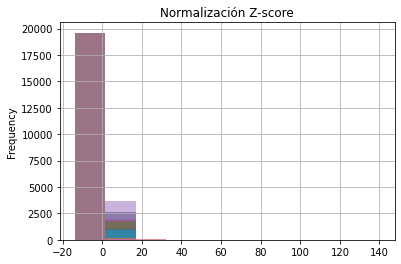

In [113]:
X_scz_df.plot.hist(alpha=0.5,legend=False,grid=True,title="Normalización Z-score")

<AxesSubplot:>

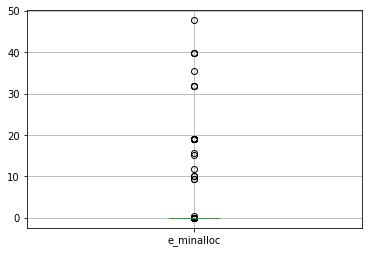

In [123]:
X_scz_df['e_minalloc'].plot.box(grid=True)

<AxesSubplot:>

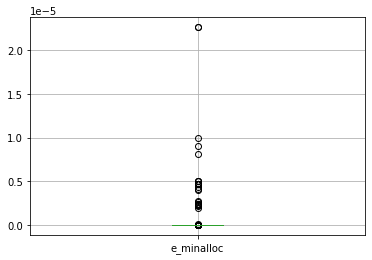

In [124]:
X_norm_df['e_minalloc'].plot.box(grid=True)

<AxesSubplot:>

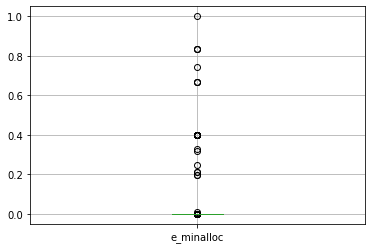

In [125]:
X_sc_df['e_minalloc'].plot.box(grid=True)

<p>Observe el siguiente conjunto de figuras: <b>¡Estandarizar no hace una distribución normal!</b></p>

<p>4.	En algunos casos, los valores en los extremos, la media y la desviación estándar se encuentran sesgados $\rightarrow$ el <b>Escalamiento Robusto</b> utiliza el rango de la mediana y los valores <i>inter</i>-cuartiles para escalar los datos.</p>

\begin{equation}
y = \frac{x-Q2}{Q3-Q1}
\end{equation}

![title](Figuras/img6-lect5.png)

In [126]:
transformer = RobustScaler()
X_rs = transformer.fit_transform(X)
X_rs_df = pd.DataFrame(X_rs,columns=X.columns)
X_rs_df.tail()

,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,e_csum,...,SectionMainChar,DirectoryEntryImport,DirectoryEntryImportSize,DirectoryEntryExport,ImageDirectoryEntryExport,ImageDirectoryEntryImport,ImageDirectoryEntryResource,ImageDirectoryEntryException,ImageDirectoryEntrySecurity,cluster_id
19606,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.666667,0.042373,0.0,0.0,-0.262609,-0.295858,0.0,0.000000,1.0
19607,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.000000,2.635593,0.0,0.0,6.103492,3.846154,0.0,59.207395,1.0
19608,0.0,-144.0,-3.0,0.0,-4.0,0.0,-65535.0,0.0,-184.0,0.0,...,0.0,-0.666667,-0.677966,0.0,0.0,-0.376994,-0.201183,0.0,0.000000,1.0
19609,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.333333,0.694915,8.0,89008.0,0.058137,-0.082840,0.0,0.000000,1.0
19610,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,5.166667,1.237288,58.0,8348.0,2.125536,1.230769,0.0,0.000000,1.0


<AxesSubplot:title={'center':'Conjunto X con escalamiento robusto'}, ylabel='Frequency'>

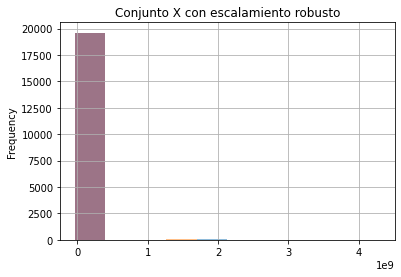

In [127]:
X_rs_df.plot.hist(alpha=0.5,legend=False,grid=True,title="Conjunto X con escalamiento robusto")

In [128]:
X_rs_df.describe()

,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,e_csum,...,SectionMainChar,DirectoryEntryImport,DirectoryEntryImportSize,DirectoryEntryExport,ImageDirectoryEntryExport,ImageDirectoryEntryImport,ImageDirectoryEntryResource,ImageDirectoryEntryException,ImageDirectoryEntrySecurity,cluster_id
count,19611.0,19611.000000,19611.000000,19611.000000,19611.000000,19611.000000,19611.000000,19611.000000,19611.00000,19611.000000,...,19611.0,19611.000000,19611.000000,19611.000000,1.961100e+04,19611.000000,19611.000000,1.961100e+04,19611.000000,19611.000000
mean,0.0,34.615726,68.660752,49.146958,33.370710,37.032635,-1356.260313,10.418490,42.46530,29.689103,...,0.0,0.352073,0.185702,14.131865,3.368566e+05,1.478640,1.226508,1.238834e+06,2.767932,0.000000
std,0.0,987.200729,1445.192977,1212.201919,864.515405,915.833139,9110.755873,637.116265,1249.68033,1015.303419,...,0.0,1.254193,1.076922,154.958102,2.181191e+07,21.570447,19.566404,5.868961e+07,68.063556,0.645514
min,0.0,-144.000000,-3.000000,0.000000,-4.000000,0.000000,-65535.000000,0.000000,-184.00000,0.000000,...,0.0,-0.666667,-0.677966,0.000000,0.000000e+00,-0.376994,-0.378698,0.000000e+00,0.000000,-1.000000
25%,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.0,-0.333333,-0.533898,0.000000,0.000000e+00,-0.241261,-0.260355,0.000000e+00,0.000000,-0.500000
50%,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000
75%,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.0,0.666667,0.466102,0.000000,0.000000e+00,0.758739,0.739645,0.000000e+00,1.000000,0.500000
max,0.0,59304.000000,63197.000000,64613.000000,43686.000000,43690.000000,0.000000,61436.000000,65280.00000,63262.000000,...,0.0,97.333333,33.355932,7319.000000,2.147484e+09,2461.253200,2398.875740,2.906159e+09,7586.160772,1.000000


<AxesSubplot:>

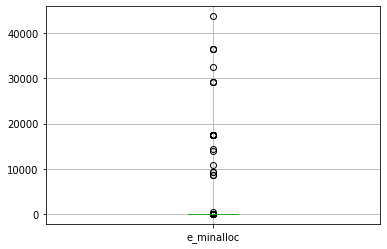

In [129]:
X_rs_df['e_minalloc'].plot.box(grid=True)

<p>5.	Transformación logarítmica: algunas veces $y = log_2(x)$ ayuda a realizar distribuciones menos oblicuas o incluso normales</p>

In [136]:
X_log = np.log(X)
X_log_df = pd.DataFrame(X_log,columns=X.columns)
X_log_df = X_log_df.replace([np.inf, -np.inf], np.nan).dropna(axis=1)
X_log_df.head()

,e_magic,e_lfanew,Machine,NumberOfSections,SizeOfOptionalHeader,Characteristics,Magic,SectionAlignment,FileAlignment,SizeOfHeaders,Subsystem,NumberOfRvaAndSizes,SectionsLength,SectionMaxVirtual,SectionMaxPointerData,SectionMaxChar,cluster_id
0,10.048324,5.513429,10.445928,1.791759,5.480639,3.526361,6.259581,8.317766,6.238325,6.931472,0.693147,2.772589,1.791759,12.507421,12.410025,22.047178,0.0
1,10.048324,5.480639,5.805135,1.609438,5.411646,5.552960,5.587249,8.317766,6.238325,6.931472,0.693147,2.772589,1.609438,12.736607,12.659947,22.056067,0.0
2,10.048324,5.545177,5.805135,1.791759,5.411646,2.639057,5.587249,8.317766,8.317766,8.317766,0.693147,6.269096,1.791759,10.715661,10.715661,21.893028,0.0
3,10.048324,4.852030,5.805135,1.945910,5.411646,6.663133,5.587249,8.317766,6.238325,6.931472,0.693147,2.772589,1.945910,13.819024,10.983257,21.894004,0.0
4,10.048324,4.852030,5.805135,1.945910,5.411646,6.663133,5.587249,8.317766,6.238325,6.931472,0.693147,2.772589,1.945910,11.208138,10.911153,21.894979,0.0


<AxesSubplot:title={'center':'Conjunto X en escala logaritmica'}, ylabel='Frequency'>

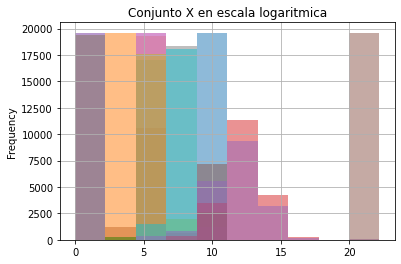

In [131]:
X_log_df.plot.hist(alpha=0.5,legend=False,grid=True,title="Conjunto X en escala logaritmica")

<AxesSubplot:>

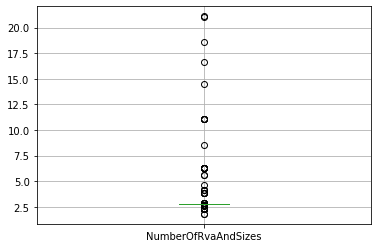

In [140]:
X_log_df['NumberOfRvaAndSizes'].plot.box(grid=True)

### Ejercicio Lectura 6

<p>Con las muestras escaladas por las diferentes técnicas de procesamiento, entrene un árbol de decisión y compare los resultados en términos de predicción.</p>


In [142]:
#La clase del algoritmo de árboles de decisión
from sklearn.tree import DecisionTreeClassifier
# La clase para dividir el conjunto de muestras en entrenamiento y prueba
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

### Prueba mediante el algoritmo de escalamiento min-max

In [148]:
#Entrenamiento con escalamiento min-max
X_train_scz, X_test_scz,y_train_scz,y_test_scz = train_test_split(X_scz_df,y)
arbol = DecisionTreeClassifier()
arbol.fit(X_train_scz,y_train_scz)

DecisionTreeClassifier()

In [149]:
y_pred_scz = arbol.predict(X_test_scz)

In [150]:
print(classification_report(y_pred_scz,y_test_scz))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1262
           1       1.00      1.00      1.00      3641

    accuracy                           1.00      4903
   macro avg       1.00      1.00      1.00      4903
weighted avg       1.00      1.00      1.00      4903



### Prueba mediante el algoritmo de escalamiento de la media

### Extra Lectura 6 POO (Python)

In [6]:
class Clase(object):
    atributo_de_clase = None #Variable de clase (atributo de clase)
    def __init__(self,a):
        self.atributo_de_instancia = a #Variables de instancia (atributos de instancia)
    def metodo(self):
        return self.atributo_de_instancia

In [10]:
c = Clase(1)
print(c.atributo_de_clase)
print(c.atributo_de_instancia)
print(c.metodo())

None
1
1
